# Homework: Learning the tools
Robert Hatem

## 3.3 Econometrics data

In [44]:
# upload libraries
library(MASS)
library(Quandl)
library(ggplot2)
library(stringr)
library(R.cache)
library(quantmod)
library(dplyr)
require(gridExtra)

3.3 (a)

In [4]:
path = '/Users/roberthatem/Documents/Chicago FinM/spring-2019/Quant Trading (Boonstra)/data/Econometrics_Data'

country_ids = list('COO_0.tab' = 'Belgium',
                   'COO_2700.tab' = 'Canada',
                   'COO_2762.tab' = 'France',
                   'COO_3026.tab' = 'Sweden')

data = list()

# get data
for (file in list.files(path)){
    if (file == 'HEET.tab'){
        HEET_df = read.table(paste(path, '/', file, sep=''), header=T,sep = "\t")
    } else {
        filepath = paste(path, '/', file, sep='')
        df = read.table(filepath, header=T,sep = "\t")
        data[[file]] = df
    }
}

3.3 (b)  
3.3 (c) interpolate _Growth_ as a function of timestamp

In [5]:
# interpolation function
interpolate = function(df, f){
    df_temp = df %>% select('DiscountRate')
    new = data.frame(Timestamp = df$Timestamp)
    df_temp$Growth = f(new$Timestamp)
    return(df_temp)
}

In [6]:
# interpolate, combine dataframes

# interpolate Growth vs. Timestamp
f <- approxfun(HEET_df$Timestamp, HEET_df$Growth)

df = data.frame()

for (key in names(data)) {
    new_df = interpolate(data[[key]], f)
    new_df = na.omit(new_df)
    new_df$country = country_ids[[key]]  # rename to country
    df = rbind(df, new_df)
}

3.3 (d) plot _Growth_ as a function of _DiscountRate_

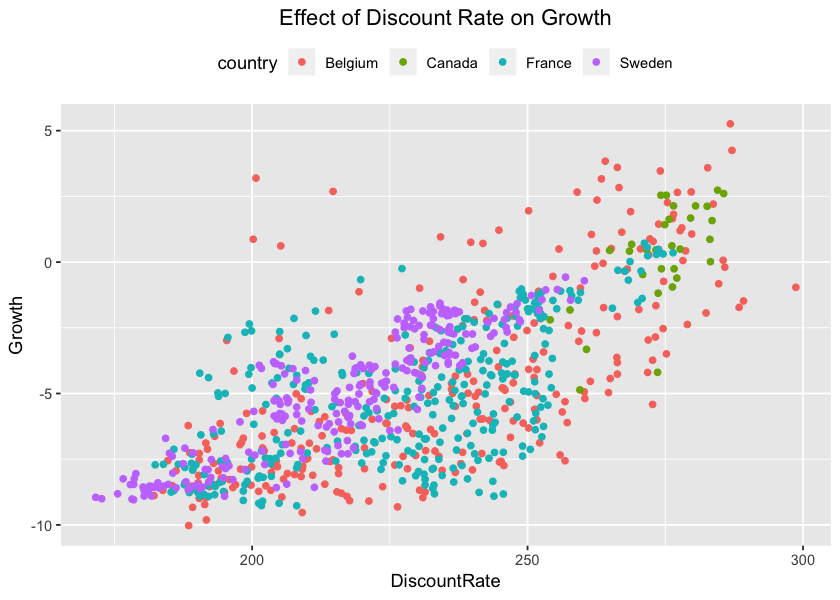

In [7]:
# Scatterplot
options(repr.plot.width=7, repr.plot.height=5)

gg <- ggplot(df, aes(x=DiscountRate, y=Growth)) + 
  geom_point(aes(col=country)) + 
  labs(title='Effect of Discount Rate on Growth',
       y="Growth", 
       x="DiscountRate") +
  theme(plot.title = element_text(hjust = 0.5), legend.position="top", legend.box = "horizontal")

plot(gg)

## Extra
Now, interpolate Growth on GDP (instead of Timestamp).

In [25]:
# interpolate, combine dataframes

# interpolate Growth vs. Timestamp
f1 <- approxfun(HEET_df$GDP, HEET_df$Growth)

df1 = data.frame()

for (key in names(data)) {
    if (key != 'COO_0.tab'){
        #print()
        new_df = interpolate(data[[key]], f1)
        new_df = na.omit(new_df)
        new_df$country = country_ids[[key]]
        df1 = rbind(df1, new_df)
    }
}

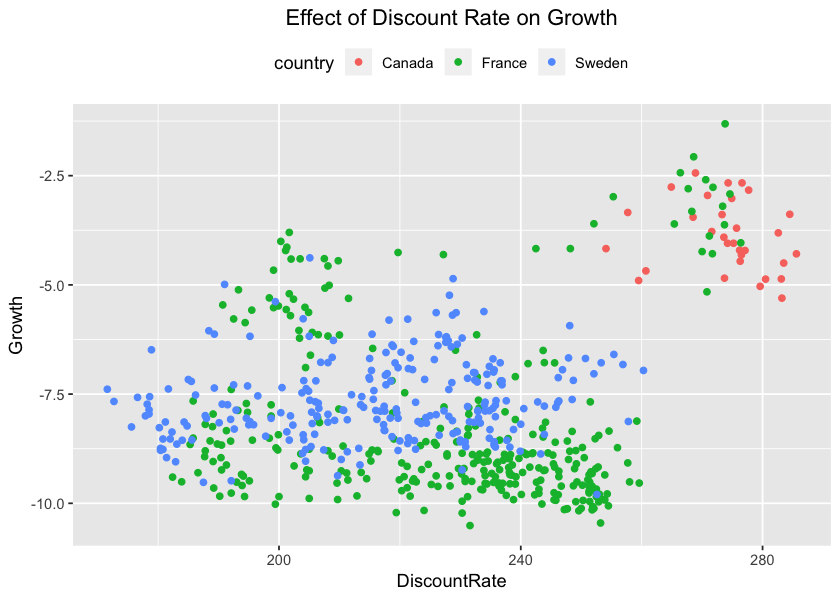

In [31]:
# Scatterplot
options(repr.plot.width=7, repr.plot.height=5)

gg1 <- ggplot(df1, aes(x=DiscountRate, y=Growth)) + 
  geom_point(aes(col=country)) + 
  labs(title='Effect of Discount Rate on Growth',
       y="Growth", 
       x="DiscountRate") +
  theme(plot.title = element_text(hjust = 0.5), legend.position="top", legend.box = "horizontal")

plot(gg1)

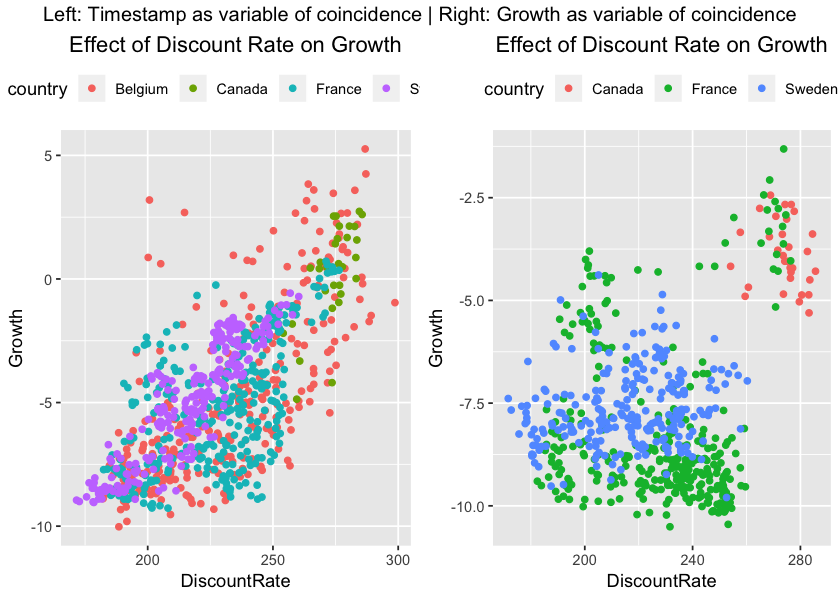

In [43]:
# both plots appear as sub-plots of a single figure
grid.arrange(gg, gg1, nrow = 1, top = "Left: Timestamp as variable of coincidence | Right: Growth as variable of coincidence")